# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [7]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [8]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # Subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [9]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

In [10]:
print X_train_feats.shape

(49000L, 155L)


## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [11]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))


# As a sanity check, print out the shapes of the data
print 'Training data shape: ', X_train.shape
print 'Validation data shape: ', X_val.shape
print 'Test data shape: ', X_test.shape


Training data shape:  (49000L, 3072L)
Validation data shape:  (1000L, 3072L)
Test data shape:  (1000L, 3072L)


In [21]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [1e5, 1e6, 1e7]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for lr in learning_rates:
    for rs in regularization_strengths:
        svm = LinearSVM()

        svm.train(X_train_feats, y_train, learning_rate=lr, reg=rs,
                      num_iters=3000, verbose=True)
        y_val_pred = svm.predict(X_val_feats)
        y_train_pred = svm.predict(X_train_feats)
        acc_train=np.mean(y_train == y_train_pred), 

        acc_v=np.mean(y_val == y_val_pred), 
        results[(lr,rs)]= acc_train[0],acc_v[0]
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    if val_accuracy>best_val:
        best_val=val_accuracy
print 'best validation accuracy achieved during cross-validation: %f' % best_val

iteration 0 / 3000: loss 83.588084
iteration 100 / 3000: loss 80.664688
iteration 200 / 3000: loss 77.856878
iteration 300 / 3000: loss 75.165595
iteration 400 / 3000: loss 72.559443
iteration 500 / 3000: loss 70.066199
iteration 600 / 3000: loss 67.681453
iteration 700 / 3000: loss 65.360790
iteration 800 / 3000: loss 63.166331
iteration 900 / 3000: loss 61.034268
iteration 1000 / 3000: loss 59.004960
iteration 1100 / 3000: loss 57.034146
iteration 1200 / 3000: loss 55.153216
iteration 1300 / 3000: loss 53.343905
iteration 1400 / 3000: loss 51.595764
iteration 1500 / 3000: loss 49.928994
iteration 1600 / 3000: loss 48.344160
iteration 1700 / 3000: loss 46.776871
iteration 1800 / 3000: loss 45.305471
iteration 1900 / 3000: loss 43.879231
iteration 2000 / 3000: loss 42.515143
iteration 2100 / 3000: loss 41.191748
iteration 2200 / 3000: loss 39.938743
iteration 2300 / 3000: loss 38.724102
iteration 2400 / 3000: loss 37.563709
iteration 2500 / 3000: loss 36.438911
iteration 2600 / 3000: l

In [27]:
# Evaluate your trained SVM on the test setsvm = LinearSVM()
best_svm= LinearSVM()
best_svm.train(X_train_feats, y_train, learning_rate=5e-9, reg=1e6,
                      num_iters=10000, verbose=True)

y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print test_accuracy

iteration 0 / 10000: loss 804.060597
iteration 100 / 10000: loss 115.514947
iteration 200 / 10000: loss 23.273159
iteration 300 / 10000: loss 10.912291
iteration 400 / 10000: loss 9.256409
iteration 500 / 10000: loss 9.034313
iteration 600 / 10000: loss 9.004590
iteration 700 / 10000: loss 9.000593
iteration 800 / 10000: loss 9.000056
iteration 900 / 10000: loss 8.999985
iteration 1000 / 10000: loss 8.999976
iteration 1100 / 10000: loss 8.999967
iteration 1200 / 10000: loss 8.999973
iteration 1300 / 10000: loss 8.999975
iteration 1400 / 10000: loss 8.999975
iteration 1500 / 10000: loss 8.999973
iteration 1600 / 10000: loss 8.999979
iteration 1700 / 10000: loss 8.999972
iteration 1800 / 10000: loss 8.999975
iteration 1900 / 10000: loss 8.999973
iteration 2000 / 10000: loss 8.999979
iteration 2100 / 10000: loss 8.999975
iteration 2200 / 10000: loss 8.999971
iteration 2300 / 10000: loss 8.999973
iteration 2400 / 10000: loss 8.999975
iteration 2500 / 10000: loss 8.999969
iteration 2600 / 1

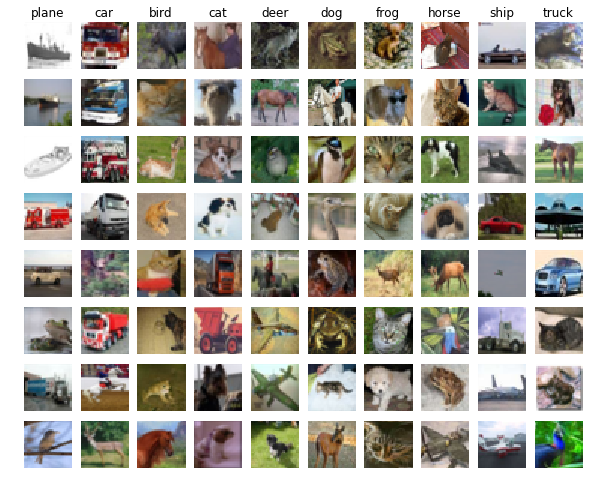

In [25]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [12]:
print X_train_feats.shape

(49000L, 155L)


In [40]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 1000
num_classes = 10


best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
lrs = [0.5,1,3,5]
regs =[0.001,0.003,0.01,0.3,1]
hidden_dims = [200,500,800,1000,1200,1500]
ba = 0
#for learning_rate in lrs:
#    for reg in regs:
#        for hidden_dim in hidden_dims:
#            net = TwoLayerNet(input_dim , hidden_dim, num_classes)
#            stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
#                        num_iters=1000, batch_size=200,
#                        learning_rate=5, learning_rate_decay=0.95,
#                        reg=0, verbose=True)
#
#            # Predict on the validation set
#            val_acc = (net.predict(X_val_feats) == y_val).mean()
#            print learning_rate,reg,hidden_dim,val_acc
#            if val_acc > ba:
#                ba = val_acc
#                ff=(learning_rate,reg,hidden_dim)
#print ff
#print ba
net = TwoLayerNet(input_dim , hidden_dim, num_classes)
stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=5, learning_rate_decay=0.95,
            reg=0, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val_feats) == y_val).mean()
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

iteration 0 / 1000: loss 2.302585
iteration 100 / 1000: loss 1.320361
iteration 200 / 1000: loss 1.372295
iteration 300 / 1000: loss 1.351799
iteration 400 / 1000: loss 1.498013
iteration 500 / 1000: loss 1.449941
iteration 600 / 1000: loss 1.252988
iteration 700 / 1000: loss 1.356438
iteration 800 / 1000: loss 1.321952
iteration 900 / 1000: loss 1.472931
0.5 0.001 200 0.516
iteration 0 / 1000: loss 2.302585
iteration 100 / 1000: loss 1.325857
iteration 200 / 1000: loss 1.421822
iteration 300 / 1000: loss 1.365152
iteration 400 / 1000: loss 1.346175
iteration 500 / 1000: loss 1.464331
iteration 600 / 1000: loss 1.442063
iteration 700 / 1000: loss 1.285711
iteration 800 / 1000: loss 1.415255
iteration 900 / 1000: loss 1.407797
0.5 0.001 500 0.513
iteration 0 / 1000: loss 2.302585
iteration 100 / 1000: loss 1.398077
iteration 200 / 1000: loss 1.359161
iteration 300 / 1000: loss 1.395715
iteration 400 / 1000: loss 1.284988
iteration 500 / 1000: loss 1.346048
iteration 600 / 1000: loss 1.3

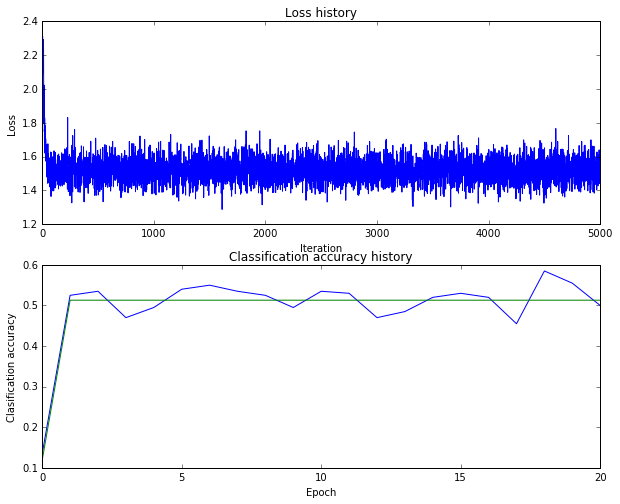

In [34]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

In [35]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print test_acc

0.496


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!